report_tram_0002.log
475999
[2.28653183e-02 2.28881836e+01 2.28881836e+01 ... 3.43322754e+01
 3.43322754e+01 3.43322754e+01]


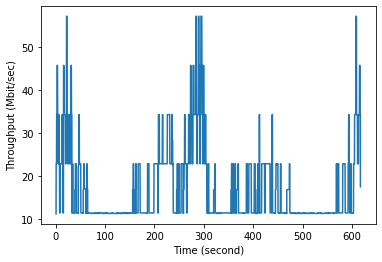

In [9]:
%run plot_mahimahi_bandwidth.py report_tram_0002.log

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import os

PACKET_SIZE = 1500.0  # bytes
BITS_IN_BYTE = 8.0
MBITS_IN_BITS = 1024**2
MILLISECONDS_IN_SECONDS = 1000.0 
N = 100
# TRACE_PATH = r'data/throughput_traces/experiment_traces/aerial1'
# TRACE_PATH = r'FCC_broadband_badnwidth_mahi'
TRACE_PATH = r'./Belgium_4GLTE_bandwidth_mahi'
# TRACE_PATH = r'data/throughput_traces/Norway_HSDPA_bandwidth_mahi'

TRACE_INDEX = 'report_bus_0001.log'


def plot(path):
	time_all = []
	packet_sent_all = []
	last_time_stamp = 0
	packet_sent = 0
	with open(path, 'rb') as f:
		for line in f:
			time_stamp = int(line.split()[0])
			if time_stamp == last_time_stamp:
				packet_sent += 1
				continue
			else:
				time_all.append(last_time_stamp)
				packet_sent_all.append(packet_sent)
				packet_sent = 1
				last_time_stamp = time_stamp
	# print(len(time_all))
	# print(packet_sent_all)
	time_window = np.array(time_all[1:]) - np.array(time_all[:-1])
	throuput_all = (((PACKET_SIZE * BITS_IN_BYTE * np.array(packet_sent_all[1:])) / time_window) * MILLISECONDS_IN_SECONDS) / MBITS_IN_BITS
# 	print(len(throuput_all))
# 	print(throuput_all)

	plt.plot(np.array(time_all[1:]) / MILLISECONDS_IN_SECONDS, 
			np.convolve(throuput_all, np.ones(N,)/N, mode='same'))
	plt.xlabel('Time (second)')
	plt.ylabel('Throughput (Mbit/sec)')
	plt.xlim(0, 100)
	plt.show()

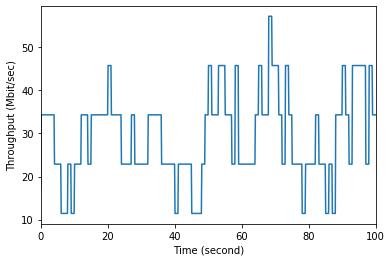

In [12]:
plot(TRACE_PATH + '/' + TRACE_INDEX)

In [73]:
    import numpy as np
    import matplotlib.pyplot as plt
    import os

    PACKET_SIZE = 1500.0  # bytes
    BITS_IN_BYTE = 8.0
    MBITS_IN_BITS = 1024**2
    MILLISECONDS_IN_SECONDS = 1000.0 
    N = 100
    # TRACE_PATH = r'data/throughput_traces/experiment_traces/aerial1'
    # TRACE_PATH = r'FCC_broadband_badnwidth_mahi'
    TRACE_PATH = r'./Belgium_4GLTE_bandwidth_mahi'
    # TRACE_PATH = r'data/throughput_traces/Norway_HSDPA_bandwidth_mahi'

    TRACE_INDEX = 'report_bus_0001.log'


    def plot(path):
        time_all = []
        packet_sent_all = []
        last_time_stamp = 0
        packet_sent = 0
        with open(path, 'rb') as f:
            for line in f:
                time_stamp = int(line.split()[0])
                if time_stamp == last_time_stamp:
                    packet_sent += 1
                    continue
                else:
                    time_all.append(last_time_stamp)
                    packet_sent_all.append(packet_sent)
                    packet_sent = 1
                    last_time_stamp = time_stamp
        # print(len(time_all))
        # print(packet_sent_all)
        traces = []
        time = []
        start_time = 0   # seconds
        count = 0
        pkt_sum = 0
        epoch_start_ts = time_all[0]
        for i in range(len(time_all)):
            if(time_all[i]>=start_time*MILLISECONDS_IN_SECONDS and time_all[i]<=(start_time+1)*MILLISECONDS_IN_SECONDS):
                pkt_sum += packet_sent_all[i]
            else:
                
                throughputInSec = ((PACKET_SIZE * BITS_IN_BYTE * pkt_sum) / (time_all[i]-epoch_start_ts))*MILLISECONDS_IN_SECONDS / MBITS_IN_BITS
                traces.append(throughputInSec)
                time.append(start_time)
                epoch_start_ts = time_all[i]
                pkt_sum = 0
                start_time+=1


        time_window = np.array(time_all[1:]) - np.array(time_all[:-1])
        throuput_all = (((PACKET_SIZE * BITS_IN_BYTE * np.array(packet_sent_all[1:])) / time_window) * MILLISECONDS_IN_SECONDS) / MBITS_IN_BITS
        # 	print(len(throuput_all))
        # 	print(throuput_all)

        plt.plot(np.array(time_all[1:]) / MILLISECONDS_IN_SECONDS, 
                np.convolve(throuput_all, np.ones(N,)/N, mode='same'))

        plt.xlabel('Time (second)')
        plt.ylabel('Throughput (Mbit/sec)')
        plt.xlim(0, 100)
        plt.show()

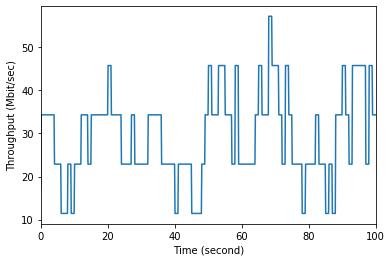

In [74]:
plot(TRACE_PATH + '/' + TRACE_INDEX)

In [ ]:
import socket
import time
import json

recv_proxy = socket.socket(socket.AF_INET,socket.SOCK_DGRAM)
recv_proxy.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
# recv_proxy.bind(("172.26.254.98", 10001))
recv_proxy.bind(('172.26.254.98', 10010))
start_time = time.time()
send_count = 0


while(True):
	data, addr = recv_proxy.recvfrom(2000)
	msg = data.decode()
	print(msg)


[monax_server]: start handshake
[monax_server]: handshake finish
[monax_server]: init successfully
[monax_client]: init start
[monax_client]: init successfully
[monax_server]: init start
[monax_server]: start handshake
[monax_client]: init start
[monax_client]: init successfully
[monax_middleware]: init start
[monax_middleware]: base ip = 100.64.0.4
[monax_server]: init start
[monax_middleware]: init successfully
[monax_server]: start handshake
[monax_server]: handshake finish
[monax_server]: init successfully
[monax_middleware]: init start
[monax_middleware]: base ip = 100.64.0.6
[monax_middleware]: init successfully
[monax_client]: init start
[monax_client]: init successfully
[monax_middleware]: init start
[monax_middleware]: base ip = 100.64.0.4
[monax_middleware]: init successfully
[monax_server]: init start
[monax_server]: start handshake
[monax_server]: handshake finish
[monax_server]: init successfully


In [6]:
import subprocess
import json
from subprocess import Popen
p = Popen("ls ./Belgium_4GLTE_bandwidth_mahi",stdout=subprocess.PIPE, shell=True)
stdout,stderr = p.communicate()
output = stdout.decode()

In [7]:
traces = output.split('\n')

In [8]:
res = {}

res['traces'] = output

In [9]:
json.dumps(res)

'{"traces": "report_bicycle_0001.log\\nreport_bicycle_0002.log\\nreport_bus_0001.log\\nreport_bus_0002.log\\nreport_bus_0003.log\\nreport_bus_0004.log\\nreport_bus_0005.log\\nreport_bus_0006.log\\nreport_bus_0007.log\\nreport_bus_0008.log\\nreport_bus_0009.log\\nreport_bus_0010.log\\nreport_bus_0011.log\\nreport_car_0001.log\\nreport_car_0002.log\\nreport_car_0003.log\\nreport_car_0004.log\\nreport_car_0005.log\\nreport_car_0006.log\\nreport_car_0007.log\\nreport_car_0008.log\\nreport_foot_0001.log\\nreport_foot_0002.log\\nreport_foot_0003.log\\nreport_foot_0004.log\\nreport_foot_0005.log\\nreport_foot_0006.log\\nreport_foot_0007.log\\nreport_foot_0008.log\\nreport_train_0001.log\\nreport_train_0002.log\\nreport_train_0003.log\\nreport_tram_0001.log\\nreport_tram_0002.log\\nreport_tram_0003.log\\nreport_tram_0004.log\\nreport_tram_0005.log\\nreport_tram_0006.log\\nreport_tram_0007.log\\nreport_tram_0008.log\\n"}'